In [1]:
import random

import healpy as hp 


from tilepy.tools import GBMMap 
import tilepy.include.PointingTools as pt 
from tilepy.include.TilingDetermination import get_gbm_tilings 
from tilepy.utils import logging

import astropy.coordinates as co
import astropy.units as u 
import numpy as np

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:

percentage = 0.68
gbmgrb = GBMMap.GBMMap("180113011","2018-01-13T00:00:00")


INFO:tilepy.tools.GBMMap:Opening fits file: http://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2018/bn180113011/quicklook/glg_healpix_all_bn180113011.fit
INFO:healpy:NSIDE = 128
INFO:healpy:ORDERING = NESTED in fits file
INFO:healpy:INDXSCHM = IMPLICIT
INFO:healpy:Ordering converted to RING


In [4]:
rapix, decpix, areapiz = pt.GetRegionInPercentage(gbmgrb.prob, gbmgrb.nside, 0.32)

Reducing map resulution to nside = 128


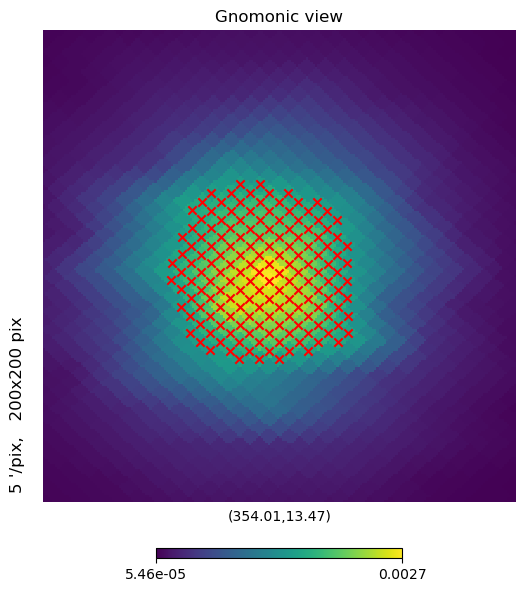

In [5]:
hp.gnomview(gbmgrb.prob, rot = [gbmgrb.ra_centre,gbmgrb.dec_centre],reso = 5., nest = False)
hp.projscatter(rapix,decpix, coord = "C",color = "red", marker = "x", lonlat = True)

In [12]:
region_c = np.c_[rapix,decpix]
region_index = np.arange(0,len(region_c))


In [13]:
area, circs_pix = intersection_area_inverse(gbmgrb.nside, region_c, region_c, 3.*u.deg)

In [15]:
#We now do a bit of testing. We select 20 random circles positions and apply the repair agent 
#and replot the circles to see if they moved 

import random 

region_index

array([ 54,  33, 113,  17,   5, 163, 111,  87,  37,  57,  19, 118,  48,
       149,  34, 159,  47, 103, 130,  44,  10,   4,   3,  91,  78,  26,
        30,  86,  38, 142,  60,  41, 128,  53, 132,  66,  52,  76,   0,
       150,  75,  67, 155,  49, 116,   2, 146,  28,  36,  74,  99,  79,
       135, 114,  61, 147,  63, 131,  27, 122,  72, 136, 120, 143, 148,
       141, 107,   6,  82,  46, 133, 102, 134,  84,   8,  92,  31, 140,
       101,  71,  85, 125,  42, 129, 153,  35, 156,  69, 112, 137,   7,
       162,  62,  64, 127, 110,  22,  94,  58,  29,  70, 117, 160,  81,
       124,  96, 100,  77, 161,  45,  23, 106,  51,   1,  21,  98, 157,
        83,  18, 119, 138,  68,  50,  12,  65,  89,  73,  88,  16,  32,
        90,  59,  15,  14, 151, 152, 154, 145, 108,   9,  13,  39, 139,
       115, 126, 144,  24,  11,  43,  56,  80, 158,  93, 123,  20,  97,
       105,  55,  95, 104, 109, 121,  40,  25])

0
[355.078125  355.078125  356.484375  352.265625  351.5625    353.671875
 356.1328125 352.6171875 356.1328125 355.78125  ] deg [16.02410031 12.32998415 11.71976031 14.16952221 11.71976031 12.94163199
 10.80692287 12.02469918 13.24801491 13.55478404] deg
Reducing map resulution to nside = 64
1
[356.8359375 356.8359375 357.1875    355.4296875 356.1328125 351.5625
 351.5625    355.078125  356.484375  354.0234375] deg [15.71386105 11.41515774 14.78593023 15.0947871  12.02469918 12.94163199
 14.16952221 13.55478404 16.02410031 13.86194967] deg
Reducing map resulution to nside = 64
2
[355.78125   354.7265625 356.484375  355.078125  355.78125   354.0234375
 352.96875   353.671875  352.96875   356.8359375] deg [11.71976031 12.02469918 15.4040937  13.55478404 12.32998415 15.71386105
 14.16952221 16.02410031 11.71976031 10.80692287] deg
Reducing map resulution to nside = 64
3
[356.484375  355.078125  351.9140625 352.96875   354.0234375 354.375
 352.265625  352.96875   356.8359375 355.78125  ] d

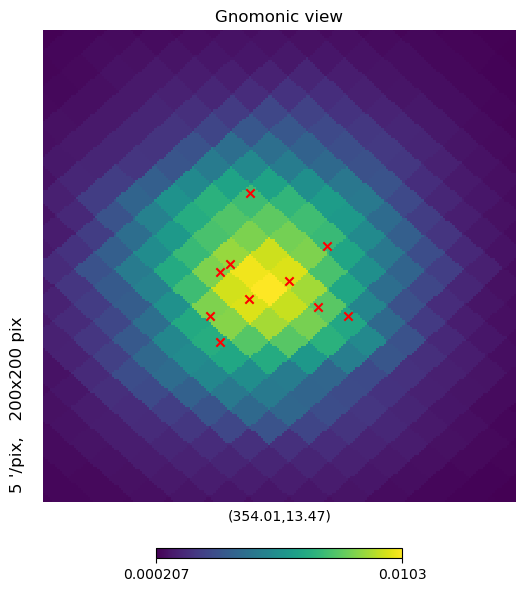

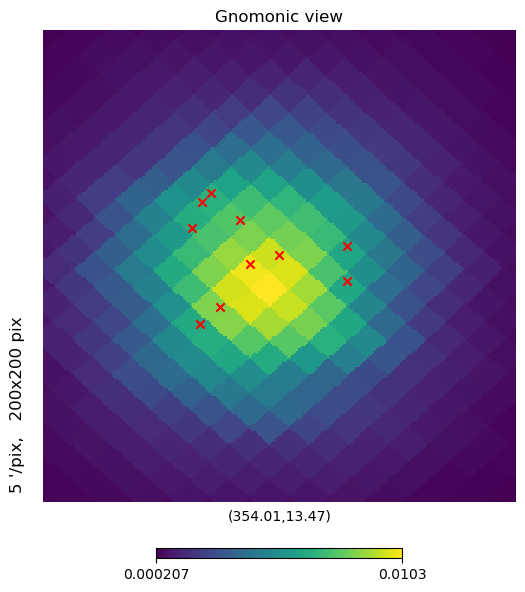

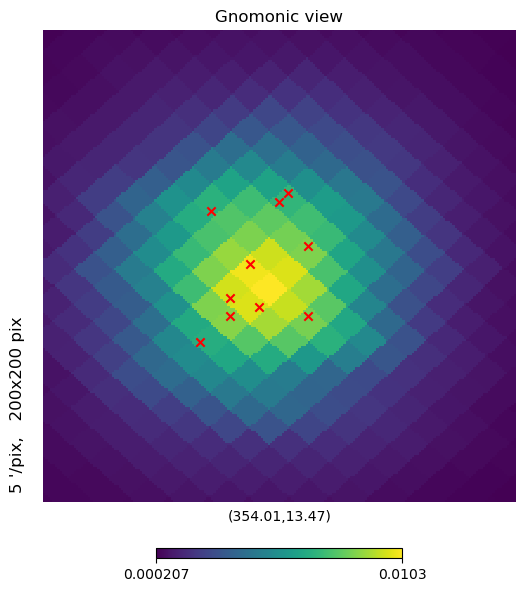

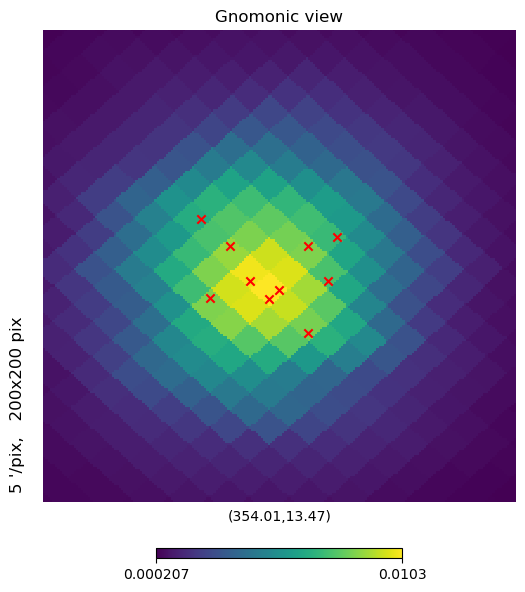

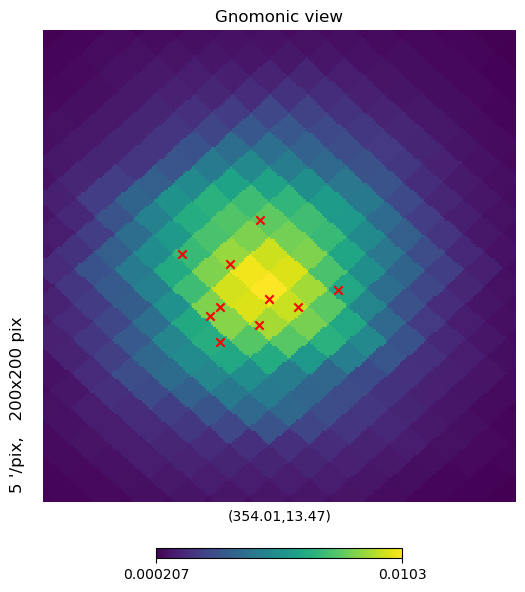

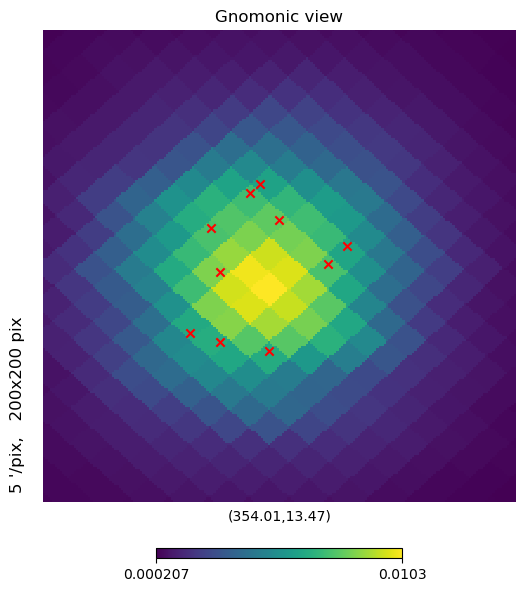

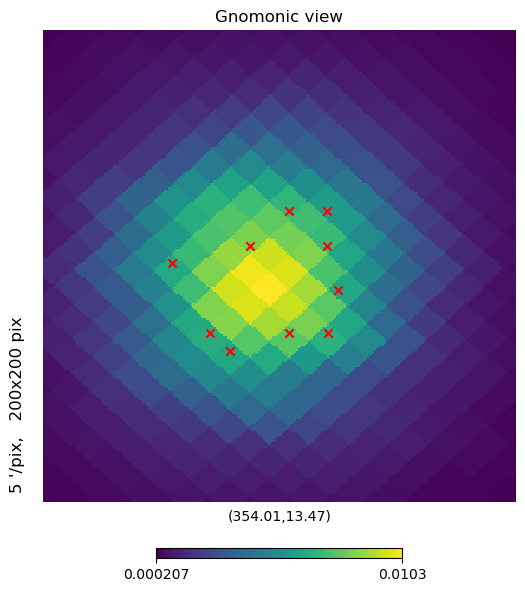

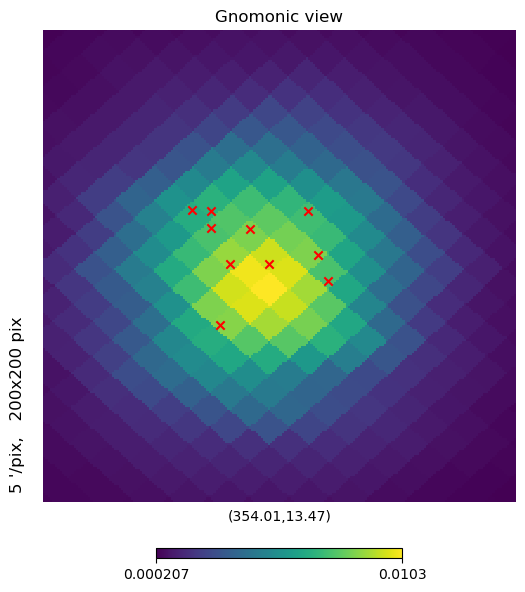

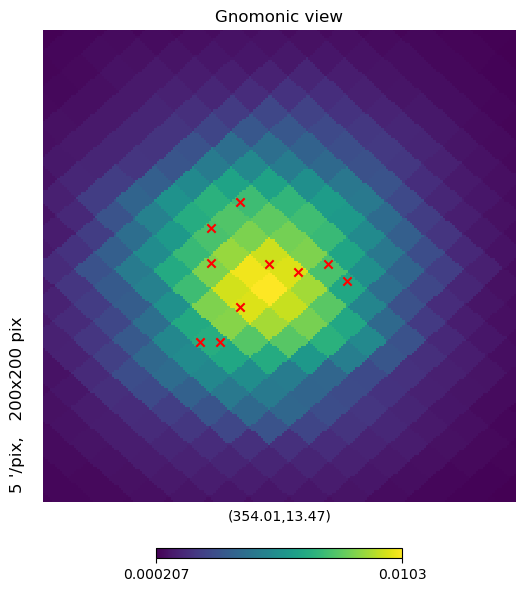

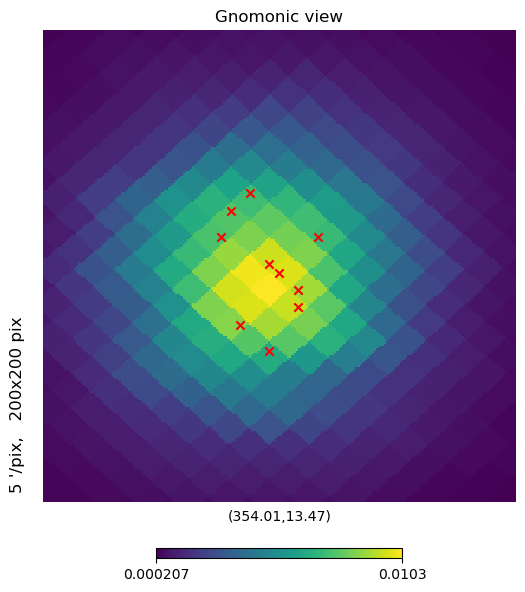

In [25]:
for itest in range(0,10):
    print(itest)
    random.shuffle(region_index)
    itest_ra = region_c[region_index[0:10]][:,0]
    itest_dec = region_c[region_index[0:10]][:,1]
    
    print(itest_ra,itest_dec)
    hp.gnomview(pt.reduce_map_resolution(gbmgrb.prob, 64), rot = [gbmgrb.ra_centre,gbmgrb.dec_centre],reso = 5., nest = False)
    hp.projscatter(itest_ra.to_value("deg"),itest_dec.to_value("deg"), coord = "C",color = "red", marker = "x", lonlat = True)



In [22]:
def repair_agent_BFGS(center_list, region, radius):
    """ Given center list, returns list of circles which are repaired """


    tupled = [(c.x, c.y) for c in center_list]
    guess = [item for sublist in tupled for item in sublist]

    optimized = optimize.minimize(intersection_area_inv, guess, args=(region, radius), method="L-BFGS-B")

    tupled_guess = grouper(2, guess)
    tupled_optimized = grouper(2, optimized.x)

    # Creating new circle list based on repaired centers
    circle_list = [get_circle(radius, center) for center in tupled_optimized]
    return circle_list

<Quantity [354.7265625, 354.375    , 357.1875   , 356.484375 , 356.484375 ,
           354.0234375, 351.9140625, 355.78125  , 355.4296875, 354.0234375] deg>

INFO:tilepy.tools.GBMMap:Opening fits file: http://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2018/bn180113011/quicklook/glg_healpix_all_bn180113011.fit
INFO:healpy:NSIDE = 128
INFO:healpy:ORDERING = NESTED in fits file
INFO:healpy:INDXSCHM = IMPLICIT
INFO:healpy:Ordering converted to RING


Reducing map resulution to nside = 128
0.55 deg
0.55 deg
0.55 deg
0.55 deg
0.55 deg
0.55 deg
0.55 deg
0.55 deg
0.55 deg
0.55 deg
Found 10 pointings
[354.375, 355.4296875, 354.0234375, 354.72656249999994, 355.078125, 353.3203125, 355.78125, 352.96874999999994, 353.671875, 356.48437499999994] [12.941631985423351, 12.635625093021117, 12.024699180565822, 13.861949672048635, 11.719760305788782, 13.248014905676952, 13.554784037178987, 12.32998415024295, 14.169522214770062, 12.32998415024295] [0.0130907595, 0.012353562, 0.011929798, 0.01182236, 0.011668489, 0.011478565, 0.0112659605, 0.011199647, 0.010745793, 0.010562217]


INFO:healpy:78.43353805239246 101.56646194760754 -11.566461947607536 11.566461947607536
INFO:healpy:The interval between parallels is 2 deg 30.00'.
INFO:healpy:The interval between meridians is 1 deg 0.00'.


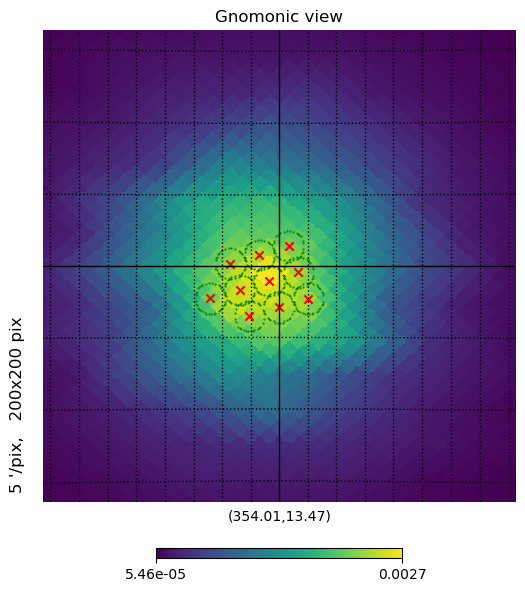

In [14]:
%matplotlib inline 

fov = 0.55 *u.deg
radius = 0.55*u.deg

gbmgrb = GBMMap.GBMMap("180113011","2018-01-13T00:00:00")
ra_tiles, dec_tiles, proba_tiles = get_gbm_tilings(gbmgrb, fov, radius, True )


Reducing map resulution to nside = 64


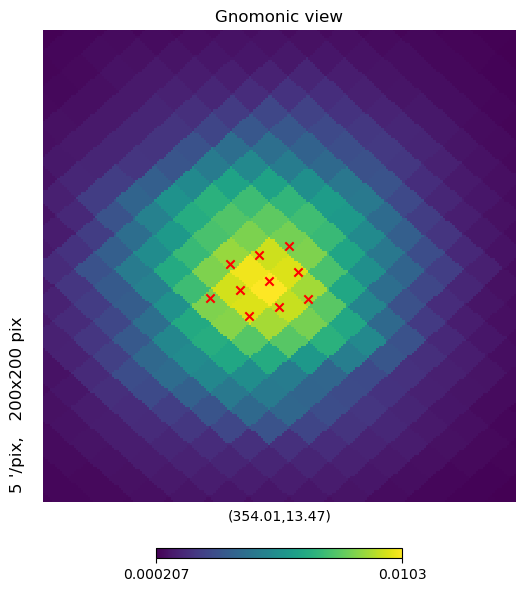